## **✪ Cat vs Dog ✪**

#### **➡️Import Required Libraries**

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mimg

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras import Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D,Rescaling, MaxPooling2D, Flatten, Dropout

#### **➡️Set Up Paths**


In [2]:
train_cats_dir = r'F:\Cats_Dogs\Train\cats'
train_dogs_dir = r'F:\Cats_Dogs\Train\dogs'

val_cats_dir = r'F:\Cats_Dogs\Validation\cats'
val_dogs_dir = r'F:\Cats_Dogs\Validation\dogs'

In [3]:
print(f"Total training cat images: {len(os.listdir(train_cats_dir))}")
print(f"Total training dog images: {len(os.listdir(train_dogs_dir))}")

Total training cat images: 10000
Total training dog images: 6400


In [4]:
print(f"Total validation cat images: {len(os.listdir(val_cats_dir))}")
print(f"Total validation dog images: {len(os.listdir(val_dogs_dir))}")

Total validation cat images: 2500
Total validation dog images: 1600


#### **➡️Build the CNN Model**


In [7]:
model = models.Sequential([
    Input(shape = (150,150,3)),
    Rescaling(1./255),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
    

#### **➡️Model Visualization**

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,470,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,494,561 (36.22 MB)

 Trainable params: 9,494,561 (36.22 MB)

 Non-trainable params: 0 (0.00 B)

#### **➡️Model Compilation**

In [9]:
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001),
	loss='binary_crossentropy',
	metrics=['accuracy']
)

#### **➡️Data Preprocessing**

In [10]:
train_datset = tf.keras.utils.image_dataset_from_directory(
    r'F:\Cats_Dogs\Train',
	labels='inferred',
	label_mode='binary',
	image_size=(150, 150),
	batch_size=32,
	shuffle=True
)


val_datset = tf.keras.utils.image_dataset_from_directory(
	r'F:\Cats_Dogs\Validation',
	labels='inferred',
	label_mode='binary',
	image_size=(150, 150),
	batch_size=32,
	shuffle=True
)	

Found 16400 files belonging to 2 classes.
Found 4100 files belonging to 2 classes.


In [12]:
suffel_buffer_size = 1000
prefetch_buffer_size = tf.data.AUTOTUNE

train_dataset_final = train_datset.cache().shuffle(suffel_buffer_size).prefetch(buffer_size=prefetch_buffer_size)

val_dataset_final = val_datset.cache().prefetch(buffer_size=prefetch_buffer_size)

#### **➡️Train Model**

In [13]:
history = model.fit(
	train_dataset_final,
	validation_data=val_dataset_final,
	epochs=15
)

Epoch 1/15
513/513 ━━━━━━━━━━━━━━━━━━━━ 124s 172ms/step - accuracy: 0.6358 - loss: 0.7759 - val_accuracy: 0.7510 - val_loss: 0.5163
Epoch 2/15
513/513 ━━━━━━━━━━━━━━━━━━━━ 95s 185ms/step - accuracy: 0.7531 - loss: 0.5054 - val_accuracy: 0.7759 - val_loss: 0.4761
Epoch 3/15
513/513 ━━━━━━━━━━━━━━━━━━━━ 91s 177ms/step - accuracy: 0.8044 - loss: 0.4262 - val_accuracy: 0.7934 - val_loss: 0.4473
Epoch 4/15
513/513 ━━━━━━━━━━━━━━━━━━━━ 89s 173ms/step - accuracy: 0.8357 - loss: 0.3706 - val_accuracy: 0.8163 - val_loss: 0.4111
Epoch 5/15
513/513 ━━━━━━━━━━━━━━━━━━━━ 92s 179ms/step - accuracy: 0.8604 - loss: 0.3244 - val_accuracy: 0.8166 - val_loss: 0.4212
Epoch 6/15
513/513 ━━━━━━━━━━━━━━━━━━━━ 91s 178ms/step - accuracy: 0.8823 - loss: 0.2719 - val_accuracy: 0.8217 - val_loss: 0.4149
Epoch 7/15
513/513 ━━━━━━━━━━━━━━━━━━━━ 94s 184ms/step - accuracy: 0.9134 - loss: 0.2217 - val_accuracy: 0.8324 - val_loss: 0.4533
Epoch 8/15
513/513 ━━━━━━━━━━━━━━━━━━━━ 98s 191ms/step - accuracy: 0.9337 - loss: 

#### **➡️Model Evaluation**

In [20]:
print("train accuracy :",history.history['accuracy'][-1])

train accuracy : 0.9855487942695618


In [21]:
print("validation accuracy :",history.history['val_accuracy'][-1])

validation accuracy : 0.8385365605354309


#### **➡️Plot Training_Accuracy VS Validation_Accuracy**

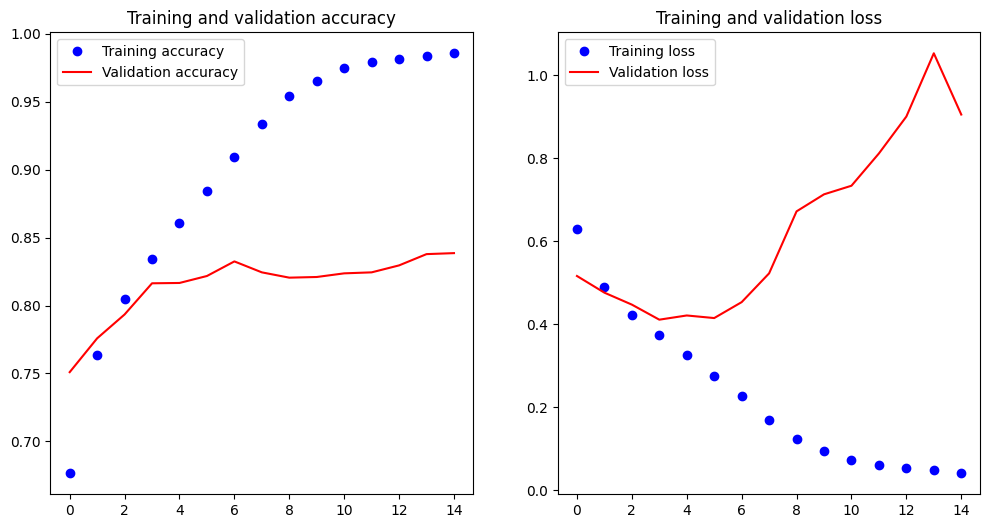

In [15]:
trn_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

trn_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(trn_acc))


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, trn_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(epochs, trn_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### **➡️Conclution**

#### **🚫Model Overfit**

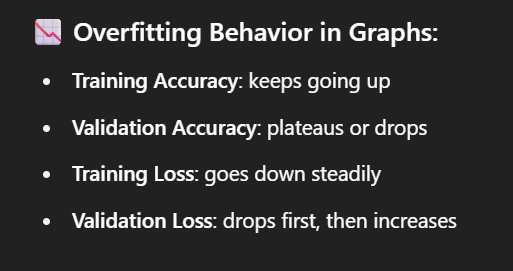

| Epoch | Train Accuracy | Val Accuracy | Train Loss | Val Loss |
| ----- | -------------- | ------------ | ---------- | -------- |
| 1     | 63.5%          | 75.1%        | 0.77       | 0.52     |
| 6     | 88.2%          | 82.1%        | 0.27       | 0.41     |
| 10    | 96.8%          | 82.1%        | 0.08       | 0.71     |
| 15    | 98.8%          | 83.8%        | 0.04       | 0.90     |


#### **▶️ Training accuracy increases but validation loss increases too ⟹ classic overfitting!**

### **✅ How to Prevent Overfitting**

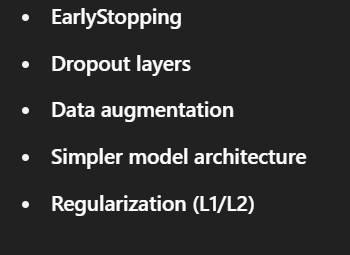